In [12]:
from pickle import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
pkl_file = open('Excels/mapes_1dia_1.pkl', 'rb')
dia = load(pkl_file)
pkl_file.close()

In [14]:
pkl_file = open('dflimpios.pkl', 'rb')
df = load(pkl_file)
pkl_file.close()

Observar MAPE

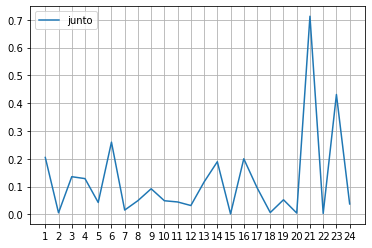

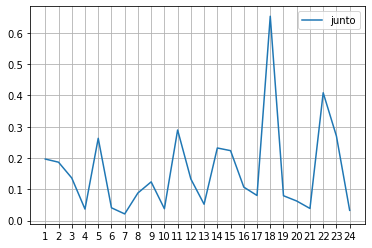

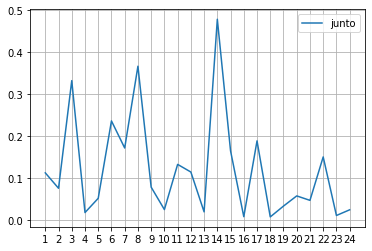

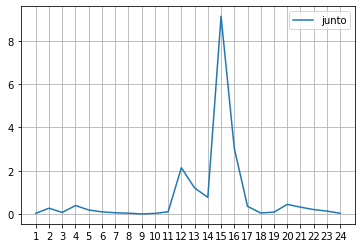

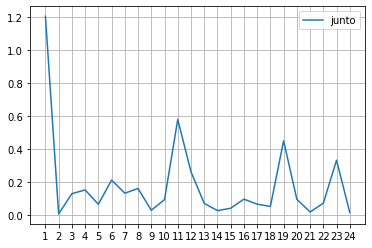

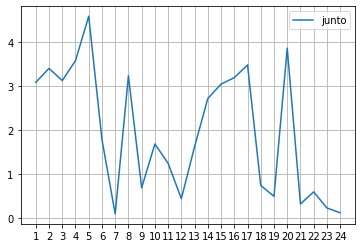

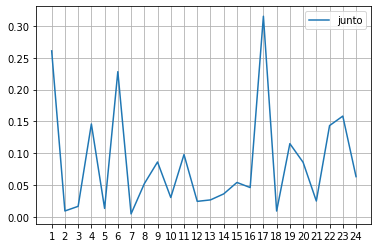

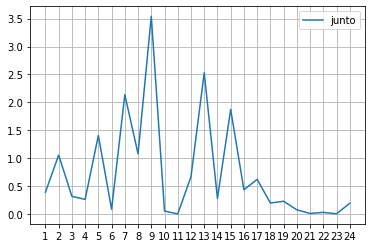

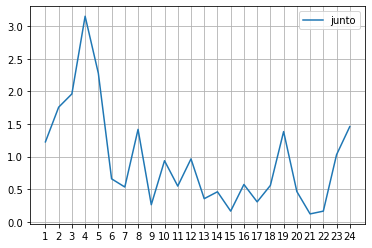

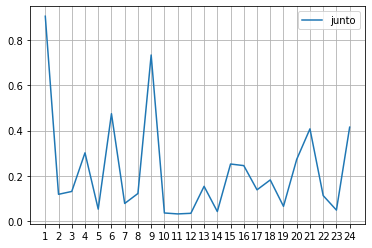

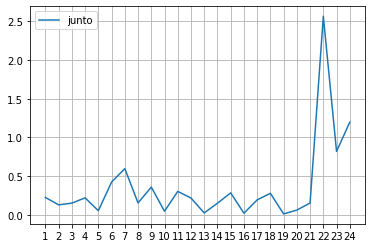

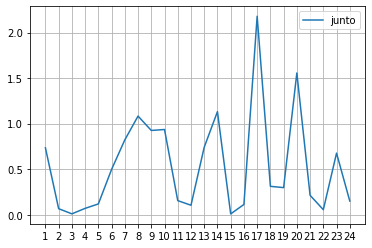

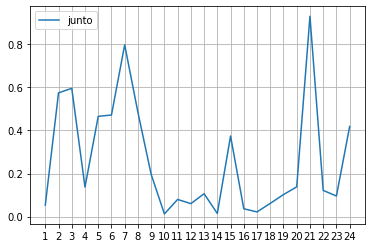

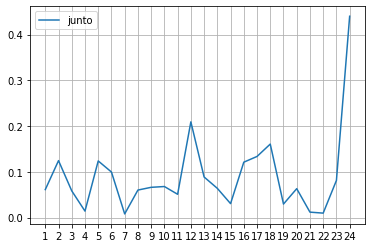

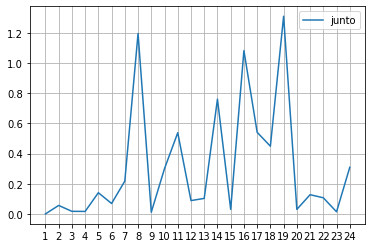

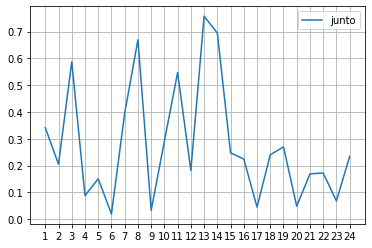

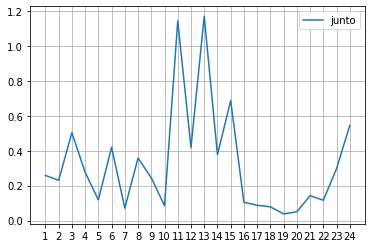

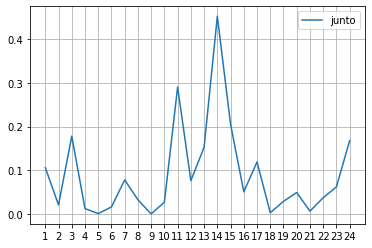

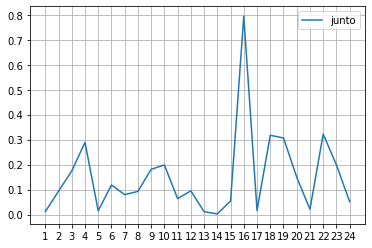

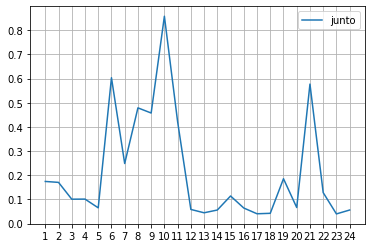

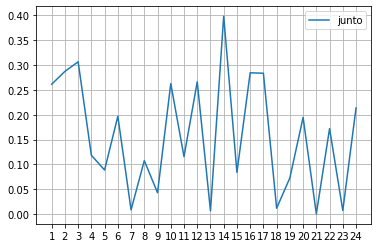

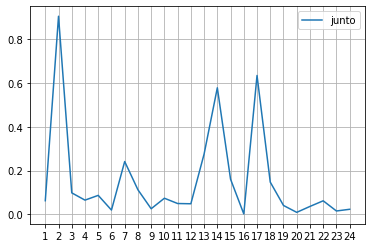

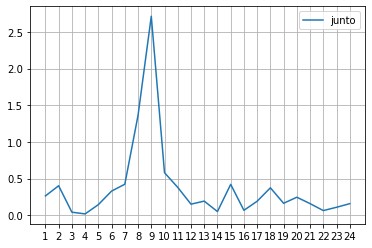

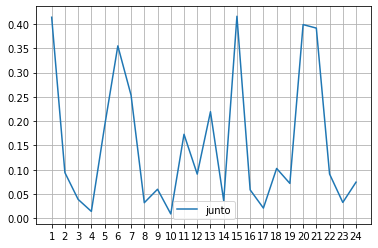

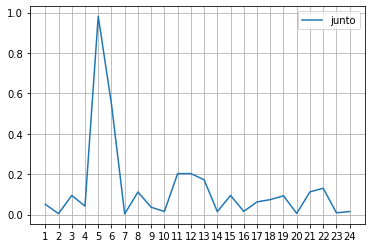

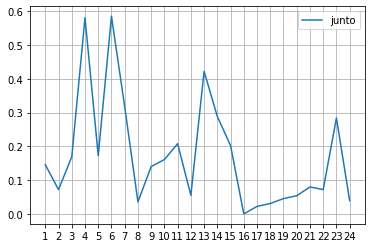

In [5]:
for i in range(1, 27):
    plt.plot(d[f"zona_{i}"].min(axis = 1), label="junto")
    plt.xticks(np.arange(min(d[f"zona_{i}"].min(axis = 1).index), max(d[f"zona_{i}"].min(axis = 1).index)+1, 1.0))
    plt.legend()
    plt.grid()
    plt.show()

Observar predicción

In [15]:
pred = {}
for i in range(1, 27):
    pred[f"zona_{i}"] = []
    for a, j in zip(range(1, 25), dia['mape'][f"zona_{i}"].idxmin(axis = 1).values):
        pred[f"zona_{i}"].extend(dia['pred'][f"zona_{i}"].at[a, j])

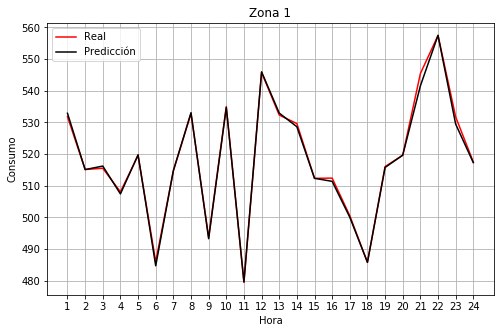

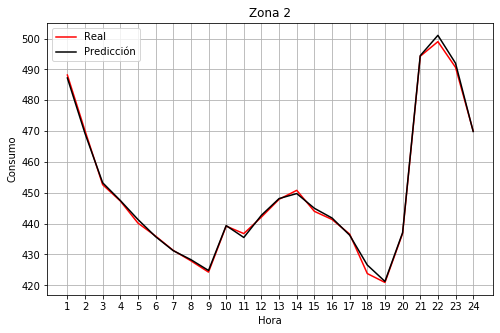

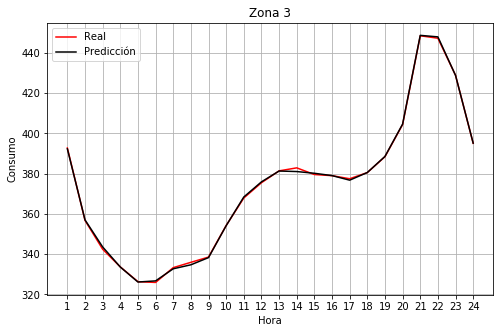

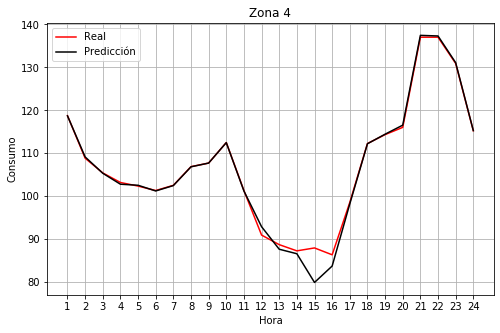

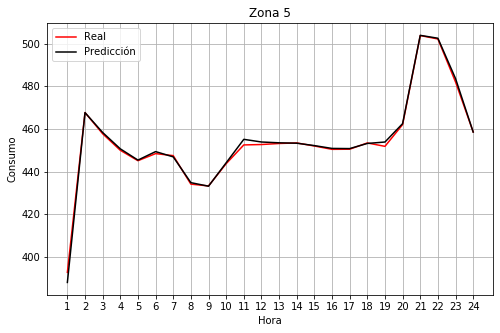

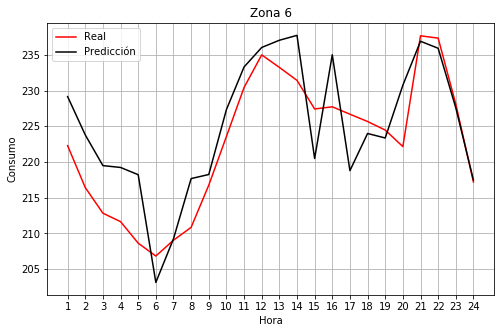

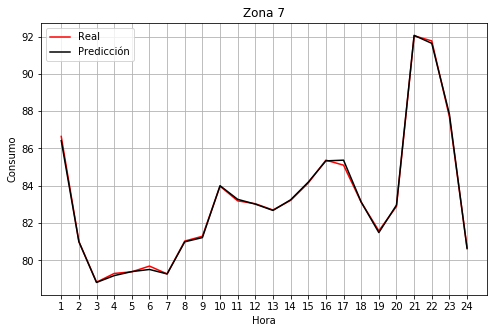

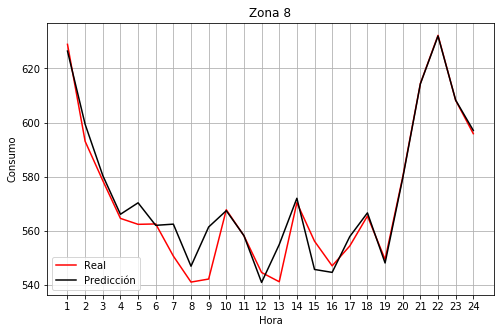

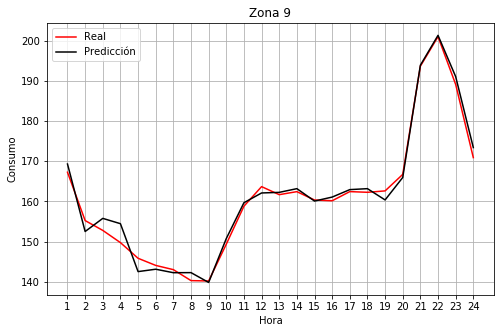

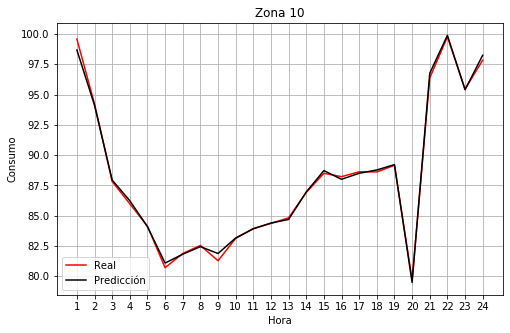

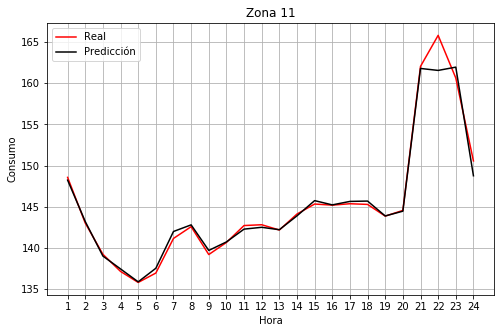

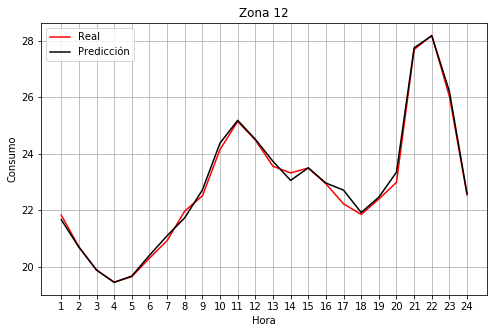

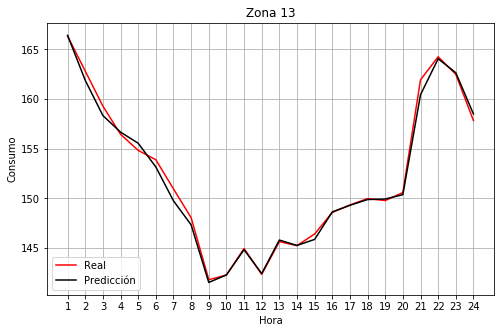

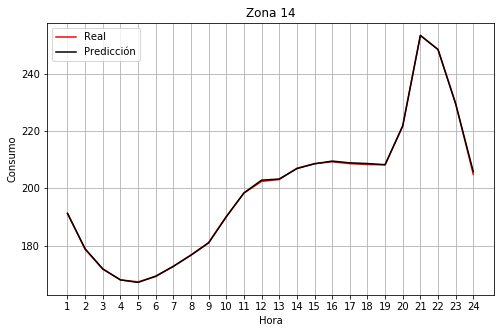

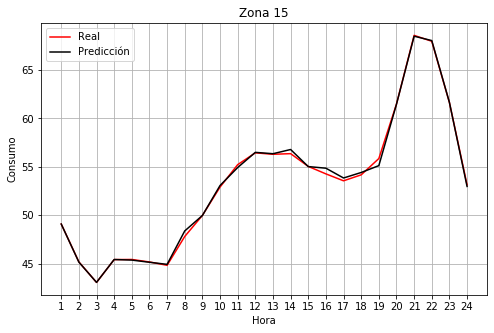

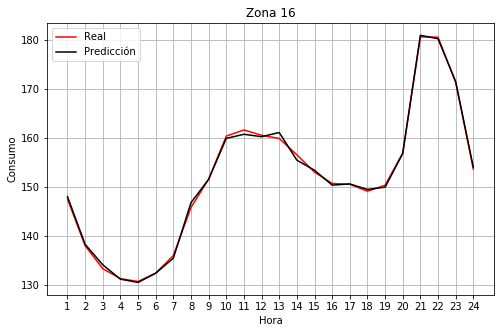

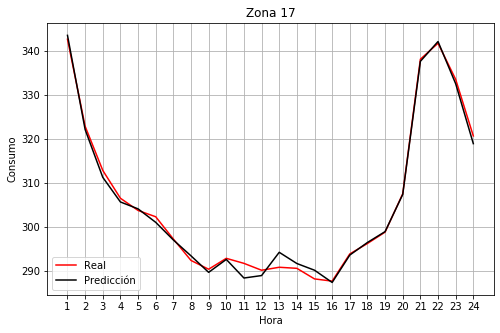

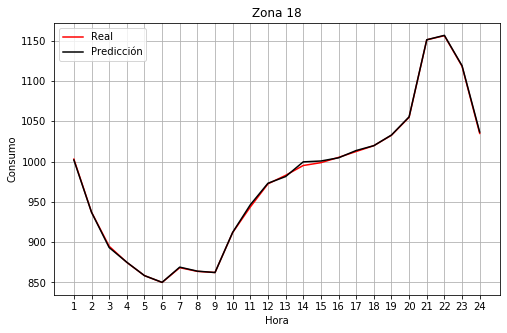

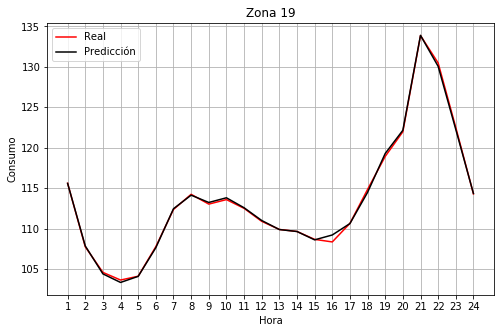

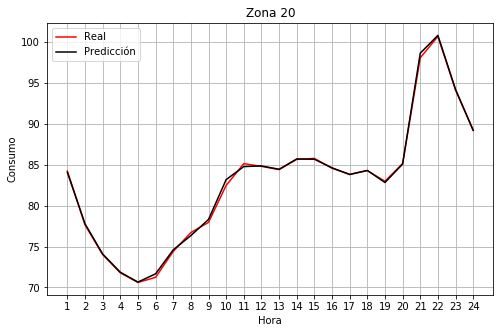

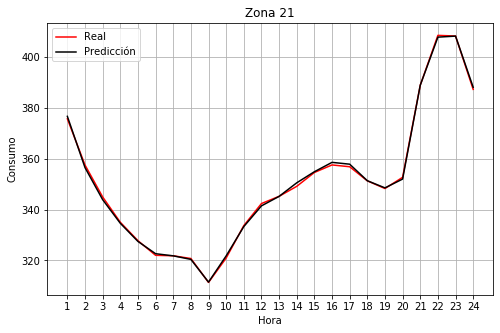

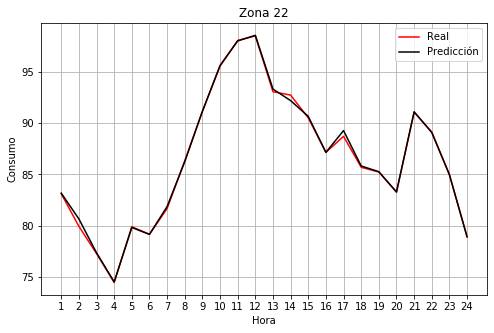

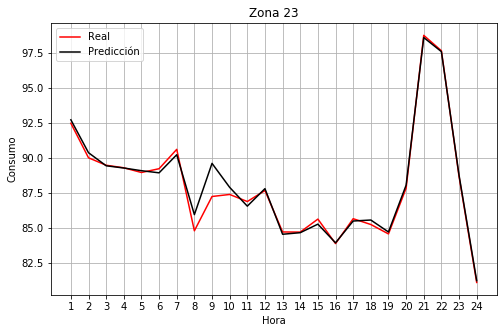

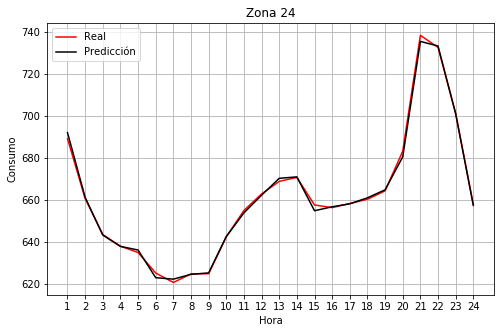

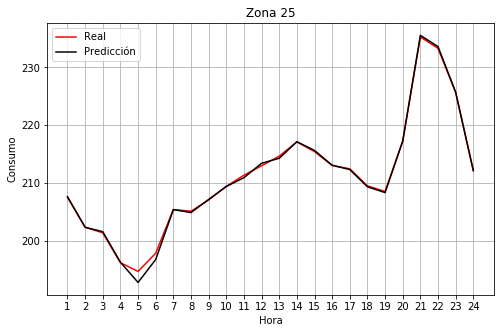

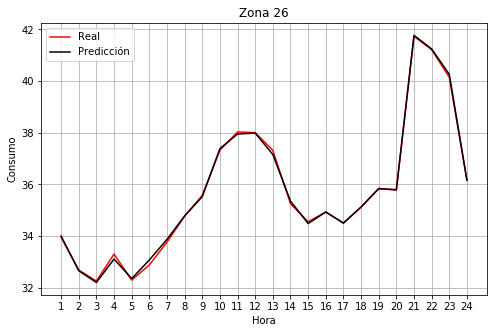

In [17]:
for i in range(1, 27):
    plt.figure(figsize=(8, 5))
    plt.plot(pd.Series(df[f"zona_{i}"].tail(24).values, index=range(1, 25)), label='Real', c='r')
    plt.plot(pd.Series(pred[f"zona_{i}"], index=range(1, 25)), label = "Predicción", c='k')
    plt.ylabel('Consumo')
    plt.xlabel("Hora")
    plt.title(f"Zona {i}")
    plt.grid()
    plt.legend()
    plt.xticks(np.arange(1, 24+1, 1.0))
    plt.show()

Encotrar modelo con mape minimo

In [ ]:

EM = pd.DataFrame()
EM[["model", "armon", "dli"]] = ED_2["zona_6"].idxmin(axis = 1).str.split('_', expand=True)
EM[["armon", "dli"]] = EM[["armon", "dli"]].astype(int, errors = 'ignore')
EM = EM.replace(['Sck', 'XGB','AR'],[1,2, 3])

In [ ]:
for z in range(1, 27):
    EM = pd.DataFrame()
    EM[["model", "armon", "dli"]] = ED[f"zona_{z}"].idxmin(axis = 1).str.split('_', expand=True)
    EM[["armon", "dli"]] = EM[["armon", "dli"]].astype(int, errors = 'ignore')
    EM = EM.replace(['Sck', 'XGB','AR'],[1,2, 3])

    for h, a, armon, datos in zip(EM.index, EM["model"], EM["armon"], EM["dli"]):  
        
        if armon and datos == None:
            y = np.array(get_zon_hor(h, z))
            y_train, y_test = train_test_split(y, test_size = float(format(4.7/len(y), '.3f')), shuffle = False)
            regresar = AR(y_train).fit()
            # Guradar modelo regresar
            output = open(f'Modelos/Zona{z}_hora{h}_AR.pkl', 'wb')
            pickle.dump(regresar, output)
            output.close()
        if a == 1:
            df = fm1(datos)
            y = np.array(get_zon_hor(h, z))
            X = kron_conv(h, z, armon)
            X_tr, X_te, y_tr, y_te = get_train_split_sick(X, y)
            regress = LinearRegression(n_jobs = -1).fit(X_tr, y_tr)
            # Guardar modelo regress
            output = open(f'Modelos/Zona{z}_hora{h}.pkl', 'wb')
            pickle.dump(regress, output)
            output.close()
        if a == 2:
            df = fm1(datos)
            y = np.array(get_zon_hor(h, z))
            X = kron_conv(h, z, armon)
            X_train, X_test, X_val, y_train, y_test, y_val = get_train_split_xgb(X, y)
            regress2 = XGBRegressor(objective ='reg:squarederror', n_jobs=-1, max_depth=3, learning_rate=1.5, n_estimators=5)
            regress2.fit(X_train, y_train, eval_set=[(X,y),(X_val,y_val)], verbose=0 , early_stopping_rounds=50)
            #Guardar modelo regress2
            output = open(f'Modelos/Zona{z}_hora{h}.pkl', 'wb')
            pickle.dump(regress2, output)
            output.close()

In [18]:
baba = []
for i in range(1, 27):
    baba.append(dia["mape"][f"zona_{i}"].min(axis = 1).mean())

In [9]:
sum(baba)/len(baba) # mape general 

0.3509504411191777

In [ ]:
ban = []
for i in range(1, 27):
    bro = d[f"zona_{i}"].index.where(d[f"zona_{i}"].min(axis = 1) > 4.5).dropna().tolist()
    ban.append(bro)


for txt in range(1, 27):
    print(ban[txt-1])

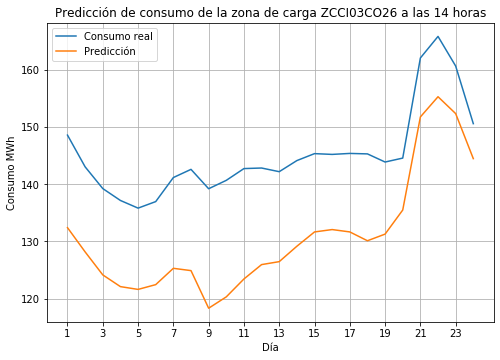

In [64]:
tt = range(1, 25)
plt.figure(figsize = (8, 5.5))

plt.plot(tt, df.zona_11.tail(24).values, label = 'Consumo real')
plt.plot(dia["pred"]["zona_11"].applymap(float)["AR"], label = 'Predicción')
plt.xticks(np.arange(1, 25, step=2));
plt.grid()
plt.ylabel("Consumo MWh")
plt.xlabel("Día")
plt.title('Predicción de consumo de la zona de carga ZCCI03CO26 a las 14 horas')
plt.legend();

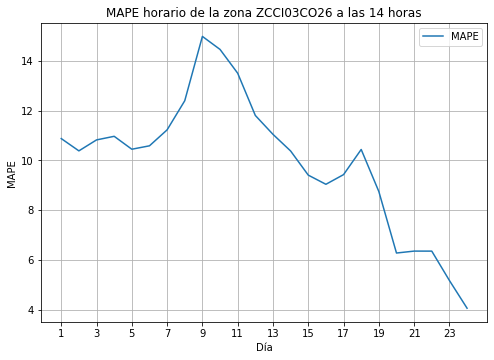

In [76]:
plt.figure(figsize = (8, 5.5))
plt.plot(dia["mape"]["zona_11"]["AR"], label = 'MAPE');
plt.xticks(np.arange(1, 25, step=2))
plt.grid()
plt.ylabel("MAPE")
plt.xlabel("Día")
plt.title('MAPE horario de la zona ZCCI03CO26 a las 14 horas')
plt.legend();